In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [3]:
df.keys()

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [4]:
df.shape

(480, 17)

In [6]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


## Fitting Linear Regression using statsmodels


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

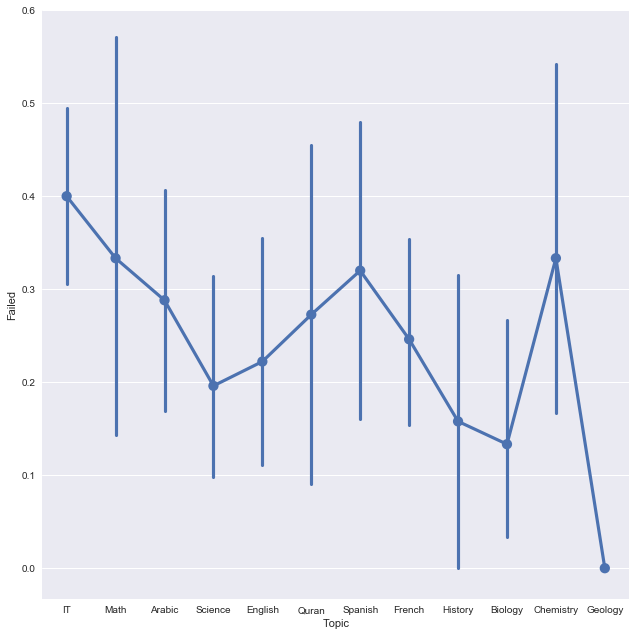

In [12]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)
plt.show()

In [21]:
m = ols('Failed ~ Class',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Failed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.857e+32
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        15:53:05   Log-Likelihood:                 16406.
No. Observations:                 480   AIC:                        -3.281e+04
Df Residuals:                     477   BIC:                        -3.279e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.629e-17   2.92e-17     -0.900      0.3

In [22]:
# Use all 17 predictors to fit linear regression model
# lm.fit(df, df.Failed)

lm = LinearRegression()
lm.fit(X, df.Failed)

ValueError: could not convert string to float: 'L'

In [23]:
print('Estimated intercept coefficient:', lm.fit_intercept)

Estimated intercept coefficient: True


In [24]:
print('Number of coefficients:', len(lm.coef_))

AttributeError: 'LinearRegression' object has no attribute 'coef_'